# K-Means Clustering for 1D array 

In [13]:
#need to know about PCA "Principle Component Analysis"
#used for dimensionality reduction
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

In [14]:
input_1d_x=np.array([1,2,3.7,4,5,126,21,33.8,6,73,2,3,56,98.01,100,4,8,33,102])


In [16]:
def input_fn_1d(input_1d) :
    input_tensor=tf.convert_to_tensor(input_1d,dtype=tf.float32)
    input_tensor=tf.expand_dims(input_tensor,1)
    
    return(input_tensor,None) #None as the second para because we don't have the y values


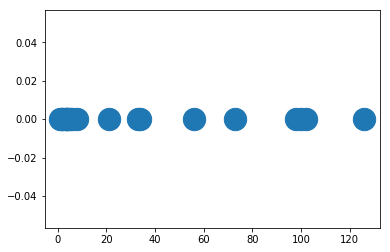

In [17]:
plt.scatter(input_1d_x,np.zeros_like(input_1d_x),s=500) #np.zeros_like(input_id_x) means no y values for them
plt.show()

# For importing the K-means clustering algo


In [18]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

In [19]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=2) # number of clusters that you want to cluster the data

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018C1BD54A90>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\user\\AppData\\Local\\Temp\\tmp3i99yibe'}


In [20]:
fit=k_means_estimator.fit(input_fn=lambda: input_fn_1d(input_1d_x),steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\user\AppData\Local\Temp\tmp3i99yibe\model.ckpt.
INFO:tensorflow:loss = 5970.091, step = 1
INFO:tensorflow:global_step/sec: 325.666
INFO:tensorflow:loss = 4641.8022, step = 101 (0.307 sec)
INFO:tensorflow:global_step/sec: 309.145
INFO:tensorflow:loss = 4641.8, step = 201 (0.324 sec)
INFO:tensorflow:global_step/sec: 535.382
INFO:tensorflow:loss = 4641.801, step = 301 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.646
INFO:tensorflow:loss = 4641.797, step = 401 (0.184 sec)
INFO:tensorflow:global_step/sec: 494.68
INFO:tensorflow:loss = 4641.8, step = 501 (0.202 sec)
INFO:tensorflow:global_step/sec: 487.424
INFO:tensorflow:loss = 4641.7983, step = 601 (0.205 sec)
INFO:tensorflow:global_step/sec: 574.871
INFO:tensorflow:loss = 4641.798, step = 701 (0.174 sec)
INFO:tensorflow

In [21]:
clusters_1d=k_means_estimator.clusters()
clusters_1d # these clusters are the centeroids of our 1D sample data

array([[ 9.730087],
       [92.50377 ]], dtype=float32)

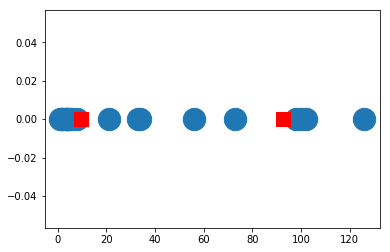

In [22]:
#now let's plot the data set
fig=plt.figure()
axl=fig.add_subplot(111)
#original data
axl.scatter(input_1d_x,np.zeros_like(input_1d_x),s=500,marker='o')
#clustered data
axl.scatter(clusters_1d,np.zeros_like(clusters_1d),c='r',s=200,marker='s')

plt.show()


In [23]:
k_means_estimator.get_params()

{'params': {'num_clusters': 2,
  'training_initial_clusters': 'random',
  'distance_metric': 'squared_euclidean',
  'random_seed': 0,
  'use_mini_batch': True,
  'mini_batch_steps_per_iteration': 1,
  'kmeans_plus_plus_num_retries': 2,
  'relative_tolerance': None}}

In [24]:
#lets iterate and look through variable associated with the model
for variable_name in fit.get_variable_names() :
    print(variable_name,"--->",fit.get_variable_value(variable_name))

Variable ---> [13001  6001]
clusters ---> [[ 9.730087]
 [92.50377 ]]
global_step ---> 1000
initialized ---> True


In [25]:
#now lets use the predict function to map which cluster a particular data point belongs to
ex_1d_x=np.array([50,150],dtype=np.float32)
predict=k_means_estimator.predict(input_fn=lambda:input_fn_1d(ex_1d_x), as_iterable=False)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmp3i99yibe\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [26]:
print(clusters_1d)
print(predict)#below you can see that datapoint 50 belongs to cluster 0 means first cluster  9.730099 and the 150 data point belongs to centeroid 92.50375 

[[ 9.730087]
 [92.50377 ]]
{'all_scores': array([[ 1621.6658,  1806.5703],
       [19675.648 ,  3305.8164]], dtype=float32), 'cluster_idx': array([0, 1], dtype=int64)}
